## Decision Tree Model

Decision Trees are used for predict probability and classification. It's more intuitive than regression. We are going 
to use some sample data to illustrate this model.
we are going to import some dummy data

In [1]:
# import the things we need first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# we want to read in the csv file provided, noticed the path down in the read_csv() can be changed as we like.
df = pd.read_csv('Decision_Tree_bankloan.csv')
df # show the first five rows

,Age,Has_job,Own_house,Outcome
0,young,True,True,No
1,young,True,False,Yes
2,young,False,True,Yes
3,young,False,False,No
4,old,True,True,Yes
5,old,True,False,No
6,old,False,True,Yes
7,old,False,False,Yes
8,old,False,False,Yes
9,old,False,False,Yes


In [3]:
# change the type of these features to `category` for mapping in the next step
df['Age'] = df['Age'].astype('category')
df['Has_job'] = df['Has_job'].astype('category') 
df['Own_house'] = df['Own_house'].astype('category')
df['Outcome'] = df['Outcome'].astype('category') 

# use .cat.codes on `category` type to map all literals to numeric values
df['Age'] = df['Age'].cat.codes
df['Has_job'] = df['Has_job'].cat.codes
df['Own_house'] = df['Own_house'].cat.codes
df['Outcome'] = df['Outcome'].cat.codes

df

,Age,Has_job,Own_house,Outcome
0,1,1,1,0
1,1,1,0,1
2,1,0,1,1
3,1,0,0,0
4,0,1,1,1
5,0,1,0,0
6,0,0,1,1
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


In [4]:
# check if the categories are balanced
df['Outcome'].value_counts()

1    13
0     3
Name: Outcome, dtype: int64

In [5]:
# extract data and target from our dataframe
data = df[['Age', 'Has_job', 'Own_house']] # this is like the independent variable: x we have in linear regression

target = df['Outcome'] # this is like the dependent variable: y
data

,Age,Has_job,Own_house
0,1,1,1
1,1,1,0
2,1,0,1
3,1,0,0
4,0,1,1
5,0,1,0
6,0,0,1
7,0,0,0
8,0,0,0
9,0,0,0


In [6]:
target

0     0
1     1
2     1
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: Outcome, dtype: int8

We have the data prepared. We can do train test split now.

In [7]:
# import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42)

In [8]:
# import decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

# instantiate a decision tree model. All parameters can be omited to use default ones.
# details please check https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train) # train our model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
x_train

,Age,Has_job,Own_house
13,0,0,0
11,0,0,0
8,0,0,0
9,0,0,0
2,1,0,1
15,0,0,0
4,0,1,1
7,0,0,0
10,0,0,0
12,0,0,0


In [10]:
y_train

13    1
11    1
8     1
9     1
2     1
15    1
4     1
7     1
10    1
12    1
3     0
6     1
Name: Outcome, dtype: int8

In [11]:
y_pred = dt.predict(x_test) # let the model predict the test data

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.25

In [13]:
print(y_pred) # what the model predict entertainment labels
print(y_test) # true labels


[1 0 1 1]
0     0
1     1
5     0
14    1
Name: Outcome, dtype: int8


Compare the predicted labels and true labels. The accuracy score formula can be seen as

$$ accuracy\_score = \frac{number\_of\_matches}{number\_of\_samples} $$



In [14]:
## we can use the model to predict any data

print(dt.predict([[1, 0,1]])) # predict when there are 6 people and weather is sunny
print(dt.predict([[1, 0,0]])) # predict when there are 5 people and weather is rainy

[1]
[0]


In [15]:
y_test = [[1, 0, 1]]
y_pred = dt.predict(y_test)
print(y_test)
print(y_pred)

[[1, 0, 1]]
[1]


### Visualize the Decision Tree

we can use `graphviz` to see what the decision tree looks like

First, run this in the directory this file is in
```
conda install python-graphviz
```

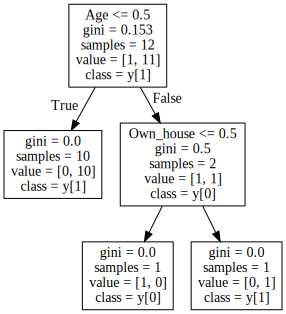

In [19]:
# show the decision tree model
# import graphviz and sklearn.tree first
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= x_train.columns)) # display the tree, with no output file

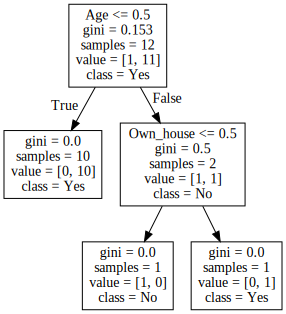

In [17]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=['No', 'Yes'], feature_names= x_train.columns)) # display the tree, with no output file

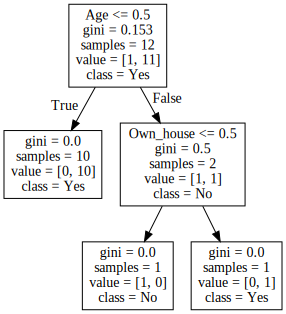

In [18]:
from sklearn import tree
import graphviz
from graphviz import Source

Source(tree.export_graphviz(dt, out_file=None, class_names=['No', 'Yes'], feature_names= x_train.columns)) # display the tree, with no output file